In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix


In [3]:
df = pd.read_csv("train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
features = ["GrLivArea", "OverallQual", "TotalBsmtSF", "GarageArea"]
target_price = "SalePrice"

df = df[features + [target_price]]


In [5]:
df.fillna(df.mean(), inplace=True)


In [6]:
X = df[features]
y = df[target_price]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.7909180297113544
RMSE: 40046.559354772515


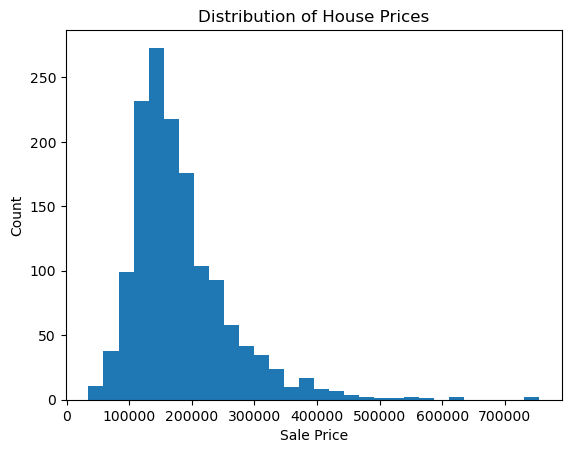

In [10]:
plt.figure()
plt.hist(df["SalePrice"], bins=30)
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Distribution of House Prices")
plt.show()


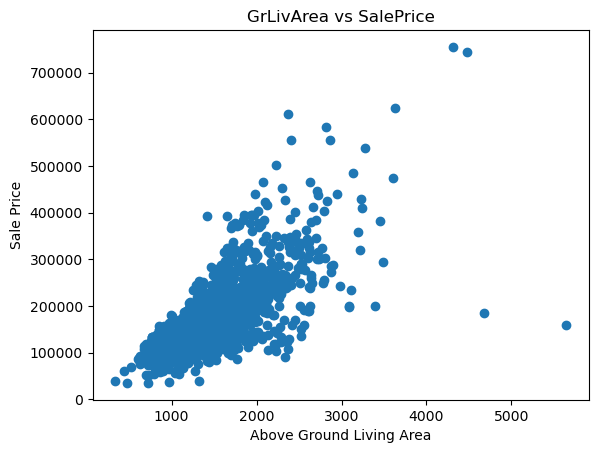

In [11]:
plt.figure()
plt.scatter(df["GrLivArea"], df["SalePrice"])
plt.xlabel("Above Ground Living Area")
plt.ylabel("Sale Price")
plt.title("GrLivArea vs SalePrice")
plt.show()


In [12]:
median_price = df["SalePrice"].median()
df["BuyHouse"] = (df["SalePrice"] > median_price).astype(int)


In [13]:
X = df[features]
y = df["BuyHouse"]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
y_pred = log_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)


Accuracy: 0.8938356164383562
Confusion Matrix:
 [[146  15]
 [ 16 115]]


In [18]:
train_score = log_model.score(X_train_scaled, y_train)
test_score = log_model.score(X_test_scaled, y_test)

print("Training Accuracy:", train_score)
print("Testing Accuracy:", test_score)


Training Accuracy: 0.8732876712328768
Testing Accuracy: 0.8938356164383562


Logistic regression is distance-based, so scaling prevents one feature from dominating others.